# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.

In [3]:
Y = weather_df['Temperature (C)']
X = weather_df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

predictions = lrm.predict(X)



Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285384


- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

<h3> 1)Linearity of the model in the coefficient</h3>

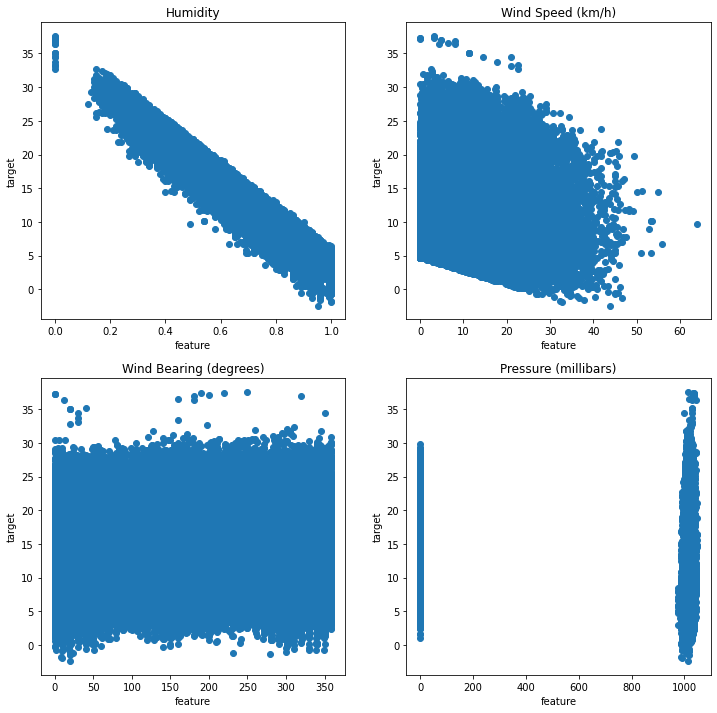

In [4]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X['Humidity'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Humidity")

plt.subplot(222)
plt.scatter(X['Wind Speed (km/h)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Speed (km/h)")

plt.subplot(223)
plt.scatter(X['Wind Bearing (degrees)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Bearing (degrees)")

plt.subplot(224)
plt.scatter(X['Pressure (millibars)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Pressure (millibars)")

plt.show()

<h3> 2) The error term should be zero on average </h3>

In [5]:
errors = Y - predictions

print("Mean of the errors in temperature model is: {}".format(np.mean(errors)))

Mean of the errors in temperature model is: -2.5354426101856083e-15


<h3>3) Homoscedasticity (Bartlett and the Levene tests)</h3>

In [6]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


<h3>4) Low multicollinearity </h3>

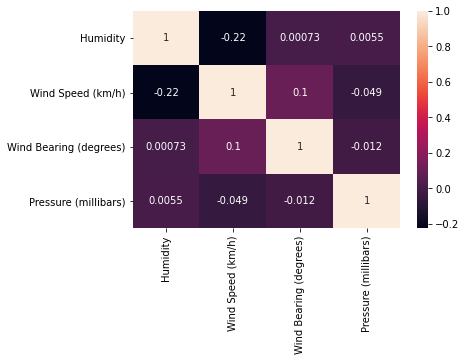

In [7]:
sns.heatmap(X.corr(), annot=True)
plt.show()

<h3>5) Error terms should be uncorrelated with one other (autocorrelation function)</h3>



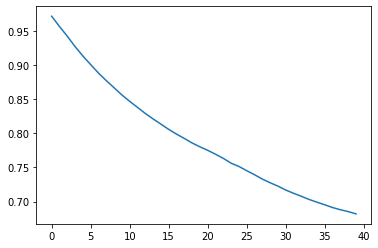

In [8]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

<h3>6) Features shouldn't be correlated with the errors (Jarque Bera and normal test)</h3>

In [9]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252353 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [10]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Reimplement the model you built in the previous lesson. 

In [11]:
house = house_prices_df.drop(['Id','PoolQC','MiscFeature', 'Alley','Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

In [12]:
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<300000)].index)
house = house.drop(house[(house["TotalBsmtSF"]>6000) & (house["SalePrice"]<200000)].index)
house = house.drop(house[(house["TotRmsAbvGrd"]>12) & (house["SalePrice"]<250000)].index)

In [13]:
house['PoolArea'] = pd.get_dummies(house['PoolArea'],drop_first=True)
house['GarageArea'] = pd.get_dummies(house['GarageArea'],drop_first=True)
house['TotalBsmtSF'] = pd.get_dummies(house['TotalBsmtSF'],drop_first=True)
house['2ndFlrSF'] = pd.get_dummies(house['2ndFlrSF'],drop_first=True)
house['Fireplaces'] = pd.get_dummies(house['Fireplaces'],drop_first=True)

In [14]:
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['YearBuilt'])
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].mean())

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_feature_mask = house.dtypes==object
categorical_cols = house.columns[categorical_feature_mask].tolist()
labelencoder = LabelEncoder()
house[categorical_cols] = house[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [16]:
house['Log_SalePrice']=np.log(house["SalePrice"]) 

In [17]:
Y = house['SalePrice']
X = house.drop('SalePrice', axis=1)

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('Coefficients: {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

predictions = lrm.predict(X)

Coefficients: [-7.22204965e+01  1.60710608e+03  2.19384662e-01  6.92054348e+03
  1.85418254e+02  1.81570572e+02 -1.98915600e+04  1.65201475e+02
 -3.94534981e+03  6.65571489e+01 -7.72103615e+02  1.28241114e+01
 -2.14861747e+02  1.71184255e+02 -3.59687108e+02 -1.36642233e+03
  3.66560338e+01 -6.39445043e+01  1.14362202e+03  1.96704957e+03
 -4.25828282e+02 -1.26034347e+02  4.45057878e+03  2.78279689e+01
 -9.64230082e+03 -1.23508807e+03 -5.30561016e+02 -4.54186604e+03
  2.15603235e+03 -1.55072322e+03  1.17772330e+03  1.47405606e+01
  2.08805733e+01  6.10977777e+00  6.66528867e-01  8.59340518e+03
 -9.59706906e+02  5.62352776e+02 -1.05027723e+04 -4.23366644e+02
 -2.98256245e+00  1.72640978e+04 -2.39286896e+01  2.99924419e+01
 -3.88804066e+03 -1.56560276e+03 -3.58550773e+03 -4.08566271e+03
 -6.17752061e+03 -9.84273402e+03 -4.87046280e+03  4.58875127e+02
  2.09129780e+03 -4.14631462e+03  1.96220592e+03 -3.93817150e+01
  1.26158812e+03 -1.73131491e+02  3.32896846e+03  6.21794134e+02
  8.9493680

- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

1) Linearity of the model in the coefficients


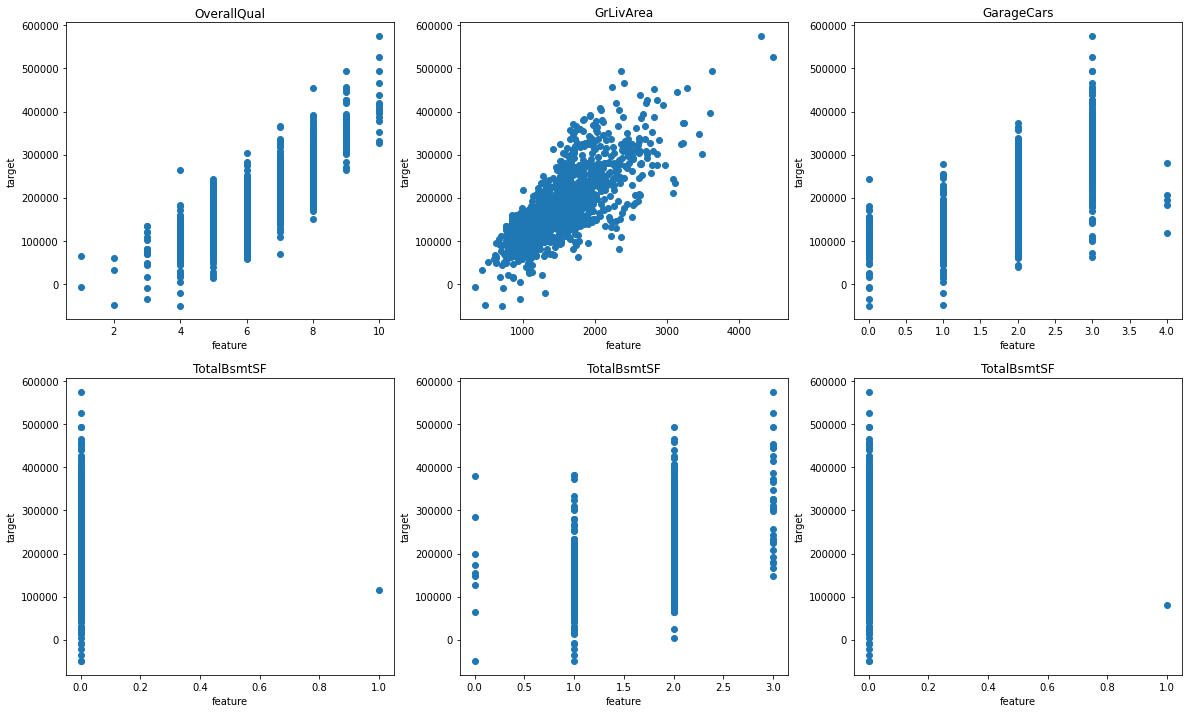

In [18]:
plt.figure(figsize=(20, 12))

plt.subplot(231)
plt.scatter(X['OverallQual'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("OverallQual")

plt.subplot(232)
plt.scatter(X['GrLivArea'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GrLivArea")

plt.subplot(233)
plt.scatter(X['GarageCars'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GarageCars")

plt.subplot(234)
plt.scatter(X['TotalBsmtSF'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("TotalBsmtSF")

plt.subplot(235)
plt.scatter(X['FullBath'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("TotalBsmtSF")

plt.subplot(236)
plt.scatter(X['2ndFlrSF'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("TotalBsmtSF")

plt.show()

2) The error term should be zero on average

In [19]:
errors = Y - predictions

print("Mean of the errors in house prices model is: {}".format(np.mean(errors)))

Mean of the errors in house prices model is: 1.9280039229127913e-10


3) Homoscedasticity (Bartlett and the Levene tests)

In [20]:
 bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2315.24 and p value is 0
Levene test statistic value is 1070.88 and p value is 2.7e-200


4) Low multicollinearity

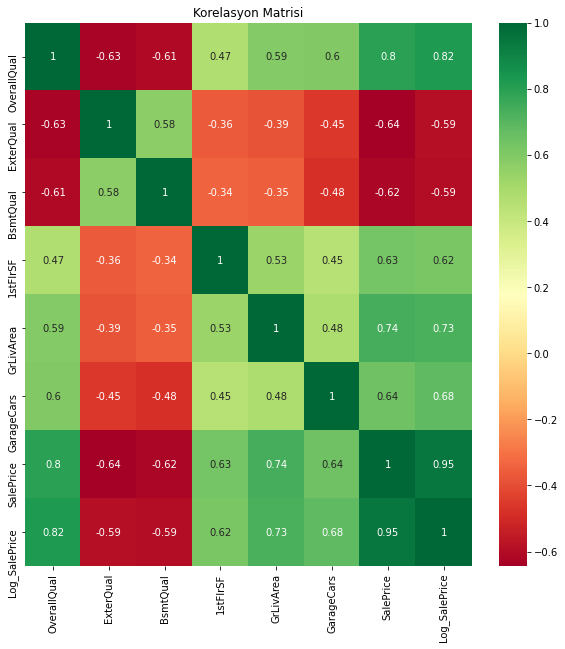

In [21]:
corrmat = house.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.6]
plt.figure(figsize=(10,10))
plt.title("Korelasyon Matrisi")
g = sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

5) Error terms should be uncorrelated with one other (visualization)


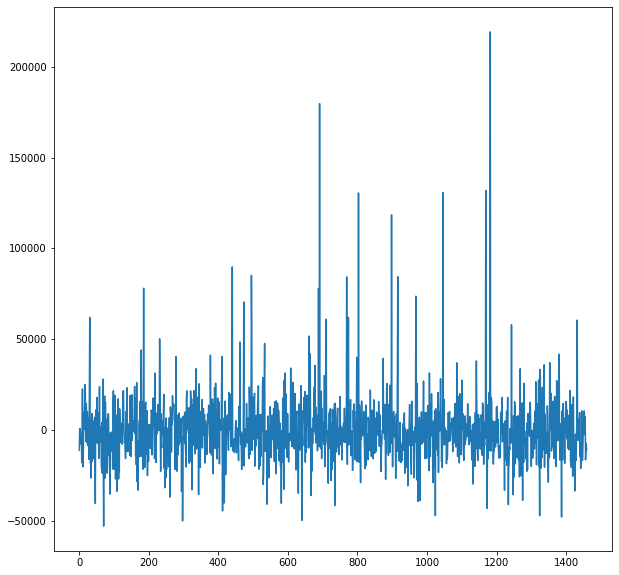

In [22]:
plt.figure(figsize=(10,10))
plt.plot(errors)
plt.show()

6) Features shouldn't be correlated with the errors (Jarque Bera and normal test)

In [23]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 47091.81494888827 and p value is 0.0
Normality test statistics is 1131.9655602439013 and p value is 1.5732644915236e-246
